In [2]:
%pip install pandas
%pip install scikit.learn
%pip install joblib
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/50/ce/a6bc93f7a44dd1fd23698698e369e141f4f24e7098d0a5937808afee3f5e/matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/80/87/a0fc2a2cddd9a4dfd7d9efa182b26d61f97398ac12eb5a8bd255184d85f3/fonttools-4.50.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -------------------------- ----------- 112.6/162.6 kB 3.2 MB/s e


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_absolute_error
from sklearn import preprocessing as pre

In [4]:
df = pd.read_csv('./diamonds.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)

cut_dict = {
  "Fair" : 0,
  "Good" : 1,
  "Very Good" : 2,
  "Premium" : 3,
  "Ideal" : 4
}

color_dict = {
  "D" : 6,
  "E" : 5,
  "F" : 4,
  "G" : 3,
  "H" : 2,
  "I" : 1,
  "J" : 0
}

clarity_dict = {
  "I1" : 0,
  "SI2" : 1,
  "SI1" : 2,
  "VS2" : 3,
  "VS1" : 4,
  "VVS2" : 5,
  "VVS1" : 6,
  "IF" : 7
}

df = df.replace(cut_dict).replace(color_dict).replace(clarity_dict)
print(df)

       carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    4      5        1   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      5        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    1      5        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3      1        3   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1      0        1   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    4      6        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    1      6        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    2      6        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3      2        1   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    4      6        1   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


C:\Users\Maycon\AppData\Local\Temp\ipykernel_11620\2726379533.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(cut_dict).replace(color_dict).replace(clarity_dict)


[[0.50234847]
 [0.4894513 ]
 [0.50337642]
 ...
 [0.51150716]
 [0.50750253]
 [0.50267415]]
262.7483554306862


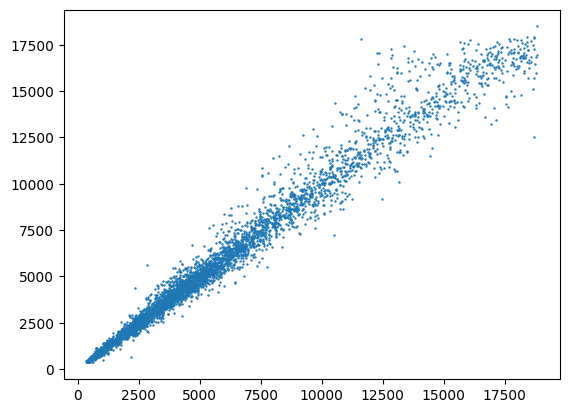

In [30]:
Y = df['price']
X = df.drop('price', axis = 1)

# scores = cross_val_score(RandomForestRegressor(n_jobs=-1), X, Y, cv = 8)

# print(scores)
# pca = PCA(n_components = 8)
# pca.fit(X)
# X = pca.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

model = RandomForestRegressor(n_jobs=-1)
# model = GridSearchCV(
#   RandomForestRegressor(),
#   {
#     'criterion' : [ 'gini', 'entropy' ],
#     'min_samples_split' : range(2, 20)
#   },
#   n_jobs = -1
# )

model.fit(X_train, Y_train)
# print(model.best_params_)
# model = model.best_estimator_
dump(model, 'model_random_forest.pkl')

# predictions = model.predict(X_train)
# print(mean_absolute_error(Y_train, predictions))
# ConfusionMatrixDisplay.from_predictions(Y_train, predictions)
# plt.show()

# predictions = model.predict(X_test)
# print(mean_absolute_error(Y_test, predictions))
# ConfusionMatrixDisplay.from_predictions(Y_test, predictions)
# plt.show()

Y_pred = model.predict(X_test)
distances = np.array([ti - pi for ti, pi in zip(Y_test, Y_pred)])
distances = distances.reshape(-1, 1)
distances = pre.MinMaxScaler().fit_transform(distances)
print(distances)

print(mean_absolute_error(Y_test, Y_pred))
plt.scatter(Y_test, Y_pred, s=0.5)
# plt.scatter(Y_test, Y_pred)
# plt.plot(Y_pred)
plt.show()